<a href="https://colab.research.google.com/github/Poohi5/cmpe258_homework/blob/master/Graded_assignment2/Kerasmultiheadclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Keras Multi Class Classification on Leaf Classification

In [0]:
import time
start = time.time()

In [2]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Sklearn modules for Data Preprocessing and train test split

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

Import Keras modules

In [4]:
from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Load Train data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/leaftrain.csv')

In [6]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [0]:
parent_data = df.copy()

In [0]:
ID = df.pop('id')

In [9]:
df.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,0.024209,0.011975,0.041252,0.008053,0.015609,0.000110,0.015128,0.020107,0.012344,0.013135,0.019131,0.006195,0.000998,0.007647,0.008854,0.018718,0.005628,0.015534,0.028261,0.016501,0.010843,0.009691,0.019502,0.001083,0.013167,0.018042,0.016268,0.031061,0.014846,0.008164,...,0.010437,0.023274,0.020317,0.010097,0.021722,0.011675,0.023895,0.006048,0.023243,0.026518,0.010514,0.003321,0.021123,0.023964,0.017060,0.019187,0.015580,0.005895,0.013875,0.025263,0.016227,0.021760,0.018595,0.016763,0.011680,0.018986,0.013240,0.007289,0.014469,0.022091,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,0.026086,0.011732,0.046341,0.013273,0.014277,0.001052,0.010821,0.021285,0.014479,0.009672,0.019463,0.010203,0.004310,0.012864,0.012724,0.012313,0.010857,0.014100,0.022852,0.016560,0.016563,0.019291,0.016000,0.002088,0.013218,0.016464,0.011484,0.023270,0.013242,0.010194,...,0.016252,0.041760,0.031532,0.018188,0.026749,0.012933,0.027225,0.015114,0.058630,0.042266,0.011852,0.012740,0.058368,0.027909,0.021796,0.025500,0.041012,0.010653,0.018022,0.046437,0.021087,0.026324,0.016007,0.029841,0.013163,0.027361,0.033402,0.013862,0.021654,0.027335,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,0.003906,0.001953,0.007812,0.000000,0.001953,0.000000,0.005859,0.005859,0.0

In [10]:
df.shape

(990, 193)

In [11]:
y = df.pop('species')
y = LabelEncoder().fit(y).transform(y)
print(y.shape)

(990,)


Some Preprocessing

In [0]:
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit(df).transform(df)
X = StandardScaler().fit(df).transform(df)

In [13]:
print(X.shape)
X

(990, 192)


array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [14]:
from keras import utils as np_utils
y_cat = to_categorical(y)
print(y_cat.shape)

(990, 99)


In [15]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=12345)
train_index, val_index = next(iter(sss.split(X, y)))
x_train, x_val = X[train_index], X[val_index]
y_train, y_val = y_cat[train_index], y_cat[val_index]
print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (792, 192)
x_val dim:    (198, 192)


Keras Sequential Model with dropout

In [0]:
model = Sequential()
model.add(Dense(768,input_dim=192,  kernel_initializer='glorot_normal', activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(768, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

Train model

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])

Earrlystopping

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(x_train, y_train,batch_size=192,epochs=2500 ,verbose=0,
                    validation_data=(x_val, y_val),callbacks=[early_stopping])

In [19]:
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

train/val loss ratio:  1.2213019983364609e-06


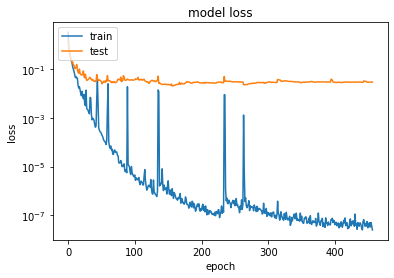

In [20]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/Leaftest.csv')
index = test.pop('id')

Predicting the Labels

In [0]:
test = preprocessing.MinMaxScaler().fit(test).transform(test)
test = StandardScaler().fit(test).transform(test)
yPred = model.predict_proba(test)

In [23]:
yPred

array([[2.7776112e-15, 9.4731572e-16, 2.4456592e-21, ..., 3.3052522e-19,
        1.9669325e-12, 7.6132747e-20],
       [1.3991710e-16, 6.1266984e-16, 2.8139371e-14, ..., 4.3780260e-13,
        1.7939190e-18, 9.3369691e-16],
       [1.5924093e-12, 9.9998701e-01, 4.8231200e-13, ..., 2.4926425e-16,
        8.8542294e-15, 4.5033923e-09],
       ...,
       [4.8642182e-14, 1.7331254e-16, 2.8390054e-14, ..., 2.6378761e-16,
        4.0500080e-17, 5.8519656e-14],
       [1.4798853e-14, 1.0006116e-13, 3.3765477e-12, ..., 1.7080450e-14,
        1.5368477e-15, 3.0815085e-16],
       [2.2184573e-19, 9.2917156e-13, 1.1338842e-14, ..., 1.9296168e-16,
        1.2673999e-18, 3.5188624e-13]], dtype=float32)